In [37]:
import logging

import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine, pdist, cdist, squareform
from sklearn.metrics import average_precision_score

from copairs.map import run_pipeline, aggregate

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
logging.basicConfig(format='%(levelname)s:%(asctime)s:%(name)s:%(message)s')
logging.getLogger("copairs").setLevel(logging.INFO)

In [3]:
subset_corrected = pd.read_parquet("../3.correct/output/subset_profiles_cc_corrected.parquet")
# subset_corrected.reset_index(inplace=True, drop=True)
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_01_256,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256
0,JCP2022_900006,ccsbBroad304_00008,ORF000425.1_TRC304.1,pLX_304,NM_001095.4,ASIC1,41,9606,acid sensing ion channel subunit 1,100.0,...,0.843520,0.076629,0.320495,-0.385691,0.190393,0.455439,0.509989,-1.019058,-0.728018,-0.842900
1,JCP2022_900176,ccsbBroad304_00189,ORF011559.1_TRC304.1,pLX_304,NM_000587.4,C7,730,9606,complement C7,100.0,...,-0.553290,-1.089465,-0.339287,-1.516528,-0.441853,-0.130403,-0.575900,0.593813,0.509472,-0.214630
2,JCP2022_900198,ccsbBroad304_00212,ORF000189.1_TRC304.1,pLX_304,NM_001745.4,CAMLG,819,9606,calcium modulating ligand,100.0,...,-0.234758,-0.754398,0.077711,-0.322006,0.405521,0.628356,0.367091,0.264900,-0.726229,-0.754226
3,JCP2022_900294,ccsbBroad304_00321,ORF012872.1_TRC304.1,pLX_304,NM_001830.4,CLCN4,1183,9606,chloride voltage-gated channel 4,100.0,...,0.015575,-0.494212,-0.287738,-0.628006,-0.710360,-0.637044,-0.199234,-0.135215,-0.290255,0.329603
4,JCP2022_900295,ccsbBroad304_00322,ORF012041.1_TRC304.1,pLX_304,NM_000084.5,CLCN5,1184,9606,chloride voltage-gated channel 5,100.0,...,-0.037950,-0.722263,-0.448482,-1.166396,-1.939791,-1.753126,-0.387831,-0.074344,0.047114,1.303154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19139,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,-2.711637,-3.969020,-0.809173,-2.974404,-2.787182,-0.704466,0.198940,2.073704,0.223352,-0.531671
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.077464,-3.094050,-0.711135,-2.103393,-1.919127,-0.485729,0.300176,1.795613,-0.029494,-0.503798
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.488416,-3.648240,-0.653903,-2.628677,-2.837781,-0.915236,0.115573,2.372484,0.350838,0.082462
19142,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.967861,-4.202986,-0.806160,-2.797058,-2.398970,-0.965612,0.605841,2.384358,0.194635,0.017635


In [4]:
# subset_corrected_jcp41 = 
subset_corrected_jcp41 = pd.concat([
    subset_corrected[subset_corrected.Metadata_JCP2022=="JCP2022_900041"],
    subset_corrected[subset_corrected.Metadata_JCP2022=="JCP2022_915131"].head(6)
    ])
subset_corrected_jcp41

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_01_256,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256
3553,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.264097,-0.392753,-0.075569,-0.318353,-0.108037,-0.182574,-0.372515,0.841889,0.568893,0.588296
3913,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.197433,0.392581,1.132172,0.677705,0.313153,0.032192,-0.375802,-0.481154,-0.311323,0.125403
4273,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.248487,-0.646166,-0.157134,-0.641147,-1.524965,-2.064200,-0.355347,0.745161,0.764271,2.571097
4632,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.769357,0.540993,0.817922,0.573094,0.389587,0.285137,0.281760,-0.161520,-0.215794,0.082825
4992,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,1.321990,1.647720,0.370340,1.140330,0.442384,-0.120958,-0.013246,-0.815855,-0.304417,0.635589
12474,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.125601,1.046982,-0.723282,0.304257,1.028124,-0.337095,-1.094298,0.062470,0.747739,1.439046
12828,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.570557,0.439361,-1.698203,0.646213,0.376546,-0.423101,-0.735288,-0.079635,0.390610,1.106746
13182,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.727720,0.064569,-1.789702,-0.196476,0.640113,-0.388975,-1.080692,0.559651,0.691498,1.230476
13536,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.347768,0.571720,-1.330192,0.075739,0.452935,-0.759102,-0.874219,0.284254,0.645284,1.296769
13890,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.861379,1.751201,-0.905810,0.180476,1.258654,0.217857,-1.341250,-0.545467,0.840185,1.259472


In [5]:
subset_corrected_jcp41.to_parquet("../3.correct/output/subset_profiles_cc_corrected_jcp41.parquet")

In [6]:
metadata = subset_corrected_jcp41.filter(regex="^Metadata_")
feature_values = subset_corrected_jcp41.filter(regex="^(?!Metadata_)").values

In [7]:
pos_sameby = ["Metadata_JCP2022"]
pos_diffby = ["Metadata_Well"]

neg_sameby = ["Metadata_Vector"]
neg_diffby = ["Metadata_pert_type"]

null_size = 10000

In [8]:
result, pos_pairs, neg_pairs = run_pipeline(
    metadata,
    feature_values, 
    pos_sameby,
    pos_diffby,
    neg_sameby,
    neg_diffby,
    null_size,
    batch_size=100000
)

INFO:2023-05-25 16:01:22,498:copairs:Indexing metadata...
INFO:2023-05-25 16:01:22,503:copairs:Finding positive pairs...
INFO:2023-05-25 16:01:22,504:copairs:dropping dups...
INFO:2023-05-25 16:01:22,506:copairs:Finding negative pairs...
INFO:2023-05-25 16:01:22,506:copairs:dropping dups...
INFO:2023-05-25 16:01:22,507:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-05-25 16:01:22,845:copairs:Computing negative similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-05-25 16:01:23,221:copairs:Building rank lists...
INFO:2023-05-25 16:01:23,226:copairs:Computing average precision...
INFO:2023-05-25 16:01:23,226:copairs:Computing null distributions...
INFO:2023-05-25 16:01:23,828:copairs:Computing P-values...
INFO:2023-05-25 16:01:23,829:copairs:Creating result DataFrame...
INFO:2023-05-25 16:01:23,831:copairs:Finished.


In [9]:
pos_pairs

,Metadata_JCP2022,ix1,ix2,dist
0,JCP2022_900041,0,5,-0.023267
1,JCP2022_900041,0,6,-0.010401
2,JCP2022_900041,0,7,-0.023111
3,JCP2022_900041,0,8,-0.024275
4,JCP2022_900041,0,9,-0.022584
5,JCP2022_900041,1,5,0.000696
6,JCP2022_900041,1,6,-0.006843
7,JCP2022_900041,1,7,-0.000214
8,JCP2022_900041,1,8,0.001997
9,JCP2022_900041,1,9,0.000118


In [19]:
neg_pairs

,ix1,ix2,dist
0,6,12,-0.006220
1,6,15,-0.173768
2,4,12,0.026043
3,3,10,-0.032311
4,5,13,-0.000275
5,4,15,-0.024863
6,3,13,-0.045559
7,5,10,-0.020156
8,9,14,-0.006564
9,8,12,0.000273


In [10]:
result[result.Metadata_JCP2022 == "JCP2022_900041"]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source_x,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Source_y,p_value,average_precision
0,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124787,H13,OAA85.86.87.88.A,source_4,0.869913,0.403492
1,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124788,H13,OAA85.86.87.88.A,source_4,0.897510,0.392381
2,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125619,H13,OAA85.86.87.88.A,source_4,0.808319,0.426825
3,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125620,H13,OAA85.86.87.88.A,source_4,0.060294,0.810000
4,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125621,H13,OAA85.86.87.88.A,source_4,0.018998,0.885000
5,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00123945,F08,OKA05.06.07.08.A,source_4,0.280172,0.644242
6,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124766,F08,OKA05.06.07.08.A,source_4,0.021498,0.876667
7,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124767,F08,OKA05.06.07.08.A,source_4,0.267373,0.653333
8,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124768,F08,OKA05.06.07.08.A,source_4,0.379662,0.592619
9,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124769,F08,OKA05.06.07.08.A,source_4,0.301070,0.633333


In [11]:
copairs_res = result[result.Metadata_JCP2022 == "JCP2022_900041"]

In [22]:
from copairs.compute_np import pairwise_cosine

In [35]:
print(pairwise_cosine(np.asarray([feature_values[0, :]] * 4), feature_values[1:5, :]))


[0.04344504 0.40690424 0.08282116 0.00323468]


In [20]:
gt = [1] * 9 + [0] * 6
h13_dists = squareform(pdist(feature_values[:5 ,:], metric="cosine"))
h13_dists
# dists

array([[0.        , 0.95655496, 0.59309576, 0.91717884, 0.99676532],
       [0.95655496, 0.        , 0.92553541, 1.01859324, 0.99939503],
       [0.59309576, 0.92553541, 0.        , 0.5741143 , 1.03527401],
       [0.91717884, 1.01859324, 0.5741143 , 0.        , 1.00179652],
       [0.99676532, 0.99939503, 1.03527401, 1.00179652, 0.        ]])

In [13]:
h13_dists = squareform(pdist(np.vstack([feature_values[:5 ,:], feature_values[10: ,:]])))
f08_dists = squareform(pdist(feature_values[5: ,:]))

In [14]:
def compute_ap(rel_k) -> np.ndarray:
    '''Compute average precision based on binary list sorted by relevance'''
    tp = np.cumsum(rel_k, axis=1)
    num_pos = tp[:, -1]
    k = np.arange(1, rel_k.shape[1] + 1)
    pr_k = tp / k
    ap = (pr_k * rel_k).sum(axis=1) / num_pos
    return ap

In [15]:
h13_aps = compute_ap((np.argsort(h13_dists, axis=1)[:,1:] < 5).astype(int))
f08_aps = compute_ap((np.argsort(f08_dists, axis=1)[:,1:] < 5).astype(int))
# man = ["manual"] * 10

In [16]:
h13_aps[:5]

array([0.70486111, 0.52777778, 0.55486111, 0.53819444, 0.59325397])

In [17]:
f08_aps[:5]

array([0.875     , 0.32628968, 0.875     , 0.40128968, 0.875     ])

In [18]:
manual = pd.DataFrame([aps[:10], man]).T
manual.columns = ["AP", "package"]
manual[["AP", "package"]]

NameError: name 'aps' is not defined

In [ ]:
evalzoo = pd.read_parquet("../2.evalzoo/results/50eec5d3/metrics_level_1_0_ref.parquet")
evalzoo.rename(columns={"sim_retrieval_average_precision_ref_i": "AP"}, inplace=True)
evalzoo["package"] = "evalzoo"
evalzoo[["AP", "package"]]

,AP,package
0,0.696825,evalzoo
1,0.696825,evalzoo
2,0.696825,evalzoo
3,0.696825,evalzoo
4,1.000000,evalzoo
5,0.811111,evalzoo
6,0.811111,evalzoo
7,0.844444,evalzoo
8,0.811111,evalzoo
9,0.811111,evalzoo


In [ ]:
copairs_res.rename(columns={"average_precision": "AP"}, inplace=True)
copairs_res["package"] = "copairs"
copairs_res[["AP", "package"]]

/var/folders/41/1jdfcmfs0gx7qwx9d31rtxgr0000gq/T/ipykernel_3581/1989103675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copairs_res.rename(columns={"average_precision": "AP"}, inplace=True)
/var/folders/41/1jdfcmfs0gx7qwx9d31rtxgr0000gq/T/ipykernel_3581/1989103675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copairs_res["package"] = "copairs"


,AP,package
0,0.403492,copairs
1,0.392381,copairs
2,0.426825,copairs
3,0.810000,copairs
4,0.885000,copairs
5,0.644242,copairs
6,0.876667,copairs
7,0.653333,copairs
8,0.592619,copairs
9,0.633333,copairs


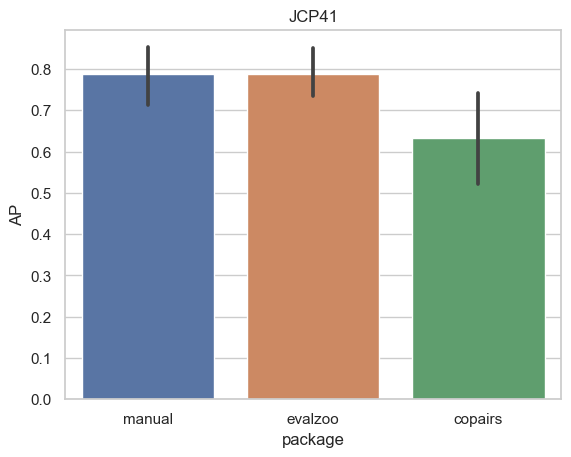

In [ ]:
jcp41 = pd.concat([manual[["AP", "package"]], evalzoo[["AP", "package"]], copairs_res[["AP", "package"]]], axis=0)

# plot ap by package
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="package", y="AP", data=jcp41)
ax.set_title("JCP41")
plt.show()